This assignment provides an opportunity to build an ANN model using the a bank marketing dataset

https://www.kaggle.com/sriharipramod/bank-loan-classification

Target variable - personal loan - reflects whether a customer accepted a personal loan offer.

Load the data and perform EDA.

1. Evaluate missing values.
2. Assess target class distribution.
3. Pre-process data as needed.
4. Assess information value of individual features (correlation analysis and pairlot).

5 pts.

In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/Dharshana03/Bank-loan-classification/main/Data/UniversalBank.csv?token=GHSAT0AAAAAACC2KLS7HXURSSBLOGSUI65GZD2CPRA'
bank = pd.read_csv(url)

In [3]:
bank.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [4]:
bank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


###1. Evaluate missing values

<Axes: >

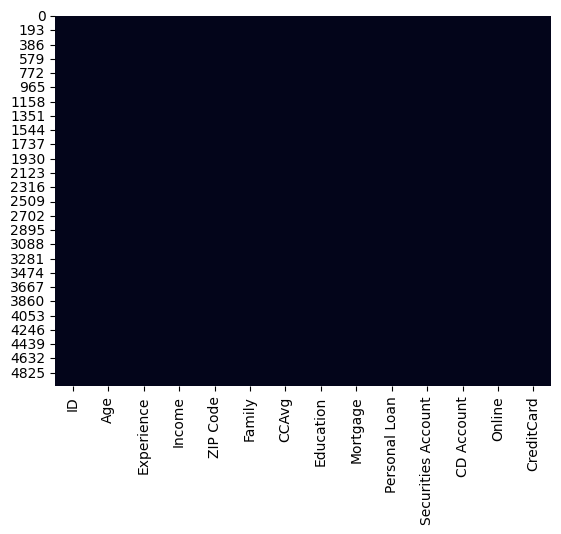

In [5]:
sns.heatmap(bank.isnull(),cbar=False)

###2. Assess target class distribution

0.1


<Axes: >

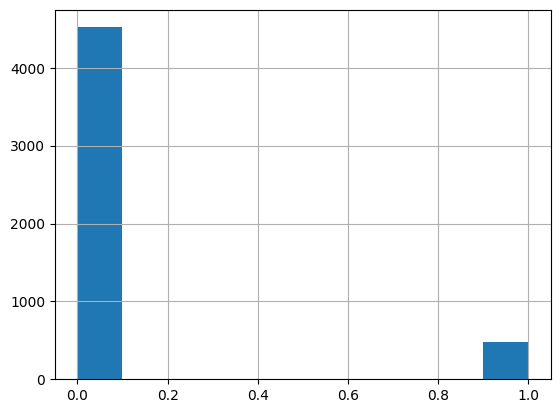

In [6]:
print(round(bank["Personal Loan"].mean(),2))
bank["Personal Loan"].hist()

### 3.Pre-process data as needed.

In [7]:
#dropping the ID column as it is redundant in predicting 
bank = bank.drop('ID', axis=1)
bank['Education'] =  bank['Education'].astype('category',copy=False)
bank['ZIP Code'] =  bank['ZIP Code'].astype('category',copy=False)


In [8]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIP Code            5000 non-null   category
 4   Family              5000 non-null   int64   
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal Loan       5000 non-null   int64   
 9   Securities Account  5000 non-null   int64   
 10  CD Account          5000 non-null   int64   
 11  Online              5000 non-null   int64   
 12  CreditCard          5000 non-null   int64   
dtypes: category(2), float64(1), int64(10)
memory usage: 464.4 KB


In [9]:
X = bank.drop('Personal Loan', axis=1)
y = bank['Personal Loan']

scaler = MinMaxScaler()
X_ = scaler.fit_transform(X)

X_rescaled = pd.DataFrame(X_, columns=X.columns)
X_rescaled.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,0.507691,0.502274,0.304510,0.959946,0.465467,0.193794,0.440500,0.088974,0.104400,0.06040,0.596800,0.294000
std,0.260526,0.249303,0.213119,0.024293,0.382554,0.174766,0.419935,0.160179,0.305809,0.23825,0.490589,0.455637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.272727,0.282609,0.143519,0.945732,0.000000,0.070000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.500000,0.500000,0.259259,0.963203,0.333333,0.150000,0.500000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,0.727273,0.717391,0.416667,0.976610,0.666667,0.250000,1.000000,0.159055,0.000000,0.00000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


### 4. Assess information value of individual features (correlation analysis and pairlot).

In [10]:
bank.corr()['Personal Loan'].sort_values(ascending=False)

Personal Loan         1.000000
Income                0.502462
CCAvg                 0.366889
CD Account            0.316355
Mortgage              0.142095
Family                0.061367
Securities Account    0.021954
Online                0.006278
CreditCard            0.002802
Experience           -0.007413
Age                  -0.007726
Name: Personal Loan, dtype: float64

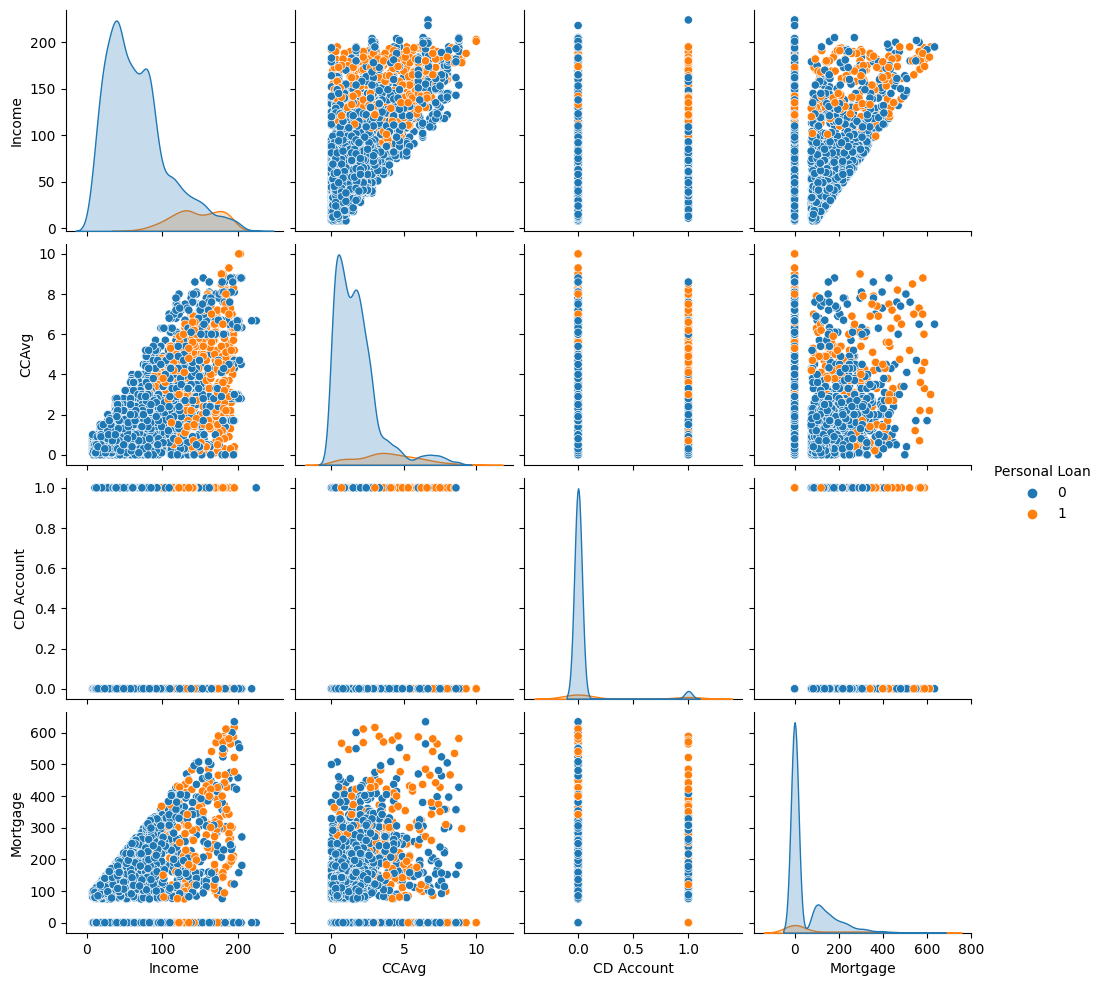

In [11]:
sns.pairplot(bank[['Income','CCAvg', 'CD Account','Mortgage','Personal Loan']], hue='Personal Loan')

5. Split the data 70/30 into training and test datasets.
6. Develop an ANN model (MLPClassifier) with a single hidden layer with 20 nodes.
7. Assess model performance, provide the confusion matrix, classification report and ROC AUC values.

10 pts.

### 5. Split the data 70/30 into training and test datasets

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_rescaled, y, test_size=0.3, random_state=1)


### 6. Develop an ANN model (MLPClassifier) with a single hidden layer with 20 nodes

In [13]:
MLPC_model = MLPClassifier(hidden_layer_sizes=20, activation='logistic', solver='adam', random_state=1,max_iter=750)

MLPC_model.fit(X_train, y_train)

y_pred_mlpc = MLPC_model.predict(X_test)



### 7. Assess model performance, provide the confusion matrix, classification report and ROC AUC values

In [14]:
print("Confusion matrix\n",confusion_matrix(y_test,y_pred_mlpc))
print("\nClassification report\n",classification_report(y_test,y_pred_mlpc))
print('ROC AUC: ', roc_auc_score(y_test,MLPC_model.predict_proba(X_test)[:,1]))


Confusion matrix
 [[1345    6]
 [  29  120]]

Classification report
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1351
           1       0.95      0.81      0.87       149

    accuracy                           0.98      1500
   macro avg       0.97      0.90      0.93      1500
weighted avg       0.98      0.98      0.98      1500

ROC AUC:  0.9835319599203176


8. Assess the effect of the number of hidden nodes (5-30) on model accuracy.
9. Identify optimal number of nodes.

5 pts.

###8.Assess the effect of the number of hidden nodes (5-30) on model accuracy.

In [15]:
from sklearn.model_selection import cross_val_score
min_hidden_layer_size = 5
max_hidden_layer_size = 30
cv_scores = [ ]

for s in range(min_hidden_layer_size,max_hidden_layer_size,5):
    MLPC_model = MLPClassifier(hidden_layer_sizes=s, activation='logistic', solver='lbfgs', random_state=1, max_iter=750)
    scores = cross_val_score(MLPC_model,X_train,y_train.values.ravel(),cv = 5,scoring = "accuracy")
    cv_scores.append(scores.mean())

### 9. Identify optimal number of nodes.

<Axes: >

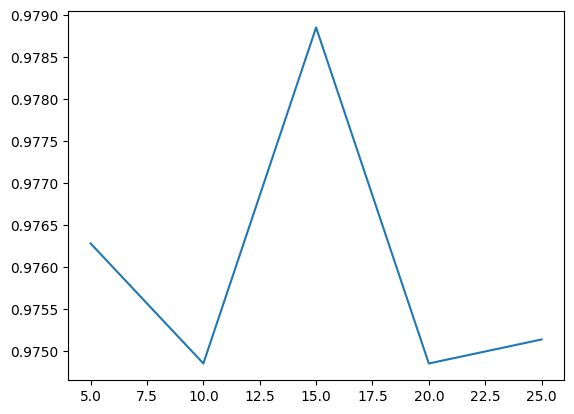

In [16]:
sns.lineplot(x=range(min_hidden_layer_size,max_hidden_layer_size,5), y=cv_scores)


In [17]:
#The cross-validation scores are computed for hidden layer sizes that are multiples of 5
# so we multiply the results by 5 to obtain the actual hidden layer sizes.
(cv_scores.index(max(cv_scores))+1)*5


15

Based on the line plot, it appears that the ideal number of nodes is 15. To verify this, we can run the model again with 15 nodes and evaluate its ROC AUC value.

In [18]:
MLPC_model = MLPClassifier(hidden_layer_sizes=15, activation='logistic', solver='adam', random_state=1,max_iter=700)
MLPC_model.fit(X_train, y_train)
y_pred_mlpc = MLPC_model.predict(X_test)

print("Confusion matrix\n",confusion_matrix(y_test,y_pred_mlpc))
print("\nClassification report\n",classification_report(y_test,y_pred_mlpc))
print('ROC AUC: ', roc_auc_score(y_test,MLPC_model.predict_proba(X_test)[:,1]))


Confusion matrix
 [[1346    5]
 [  29  120]]

Classification report
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1351
           1       0.96      0.81      0.88       149

    accuracy                           0.98      1500
   macro avg       0.97      0.90      0.93      1500
weighted avg       0.98      0.98      0.98      1500

ROC AUC:  0.9830351864639169


In conclusion, I have observed a minor decline in the ROC AUC value after using the optimal number of nodes, but the f1-score and precision have improved when the number of nodes was set to 15. Therefore, I believe that 15 nodes can be considered as the optimal number for this model, as it achieves better precision and f1-score while maintaining a similar level of ROC AUC performance.